In [1]:
import cv2 as cv
import math
import numpy as np
from matplotlib import pyplot as plt
import random as rng

sift = cv.SIFT_create()
bf = cv.BFMatcher()

In [2]:
def getFeatureData(img1, img2):
    kp1, d1 = sift.detectAndCompute(img1,None)#key points and detectors
    kp2, d2 = sift.detectAndCompute(img2,None)#key points and detectors
    matches = bf.knnMatch(d1,d2,k=2)#matcher
    pl = []#points left
    pr = []#pounts Right
    
    #lowes ratio
    for m,n in matches:
        if(m.distance < 0.75*n.distance):
            pr.append(kp2[m.trainIdx].pt)
            pl.append(kp1[m.queryIdx].pt)
    pr = np.int32(pr)
    pl = np.int32(pl)
    return kp1,kp2,d1,d2,pr,pl#return all data

In [3]:
def drawlines(img10,img20,lines,pts1,pts2):
    r = img10.shape[0]
    c = img10.shape[1]
    img10 = cv.cvtColor(img10,cv.COLOR_GRAY2BGR)
    img20 = cv.cvtColor(img20,cv.COLOR_GRAY2BGR)
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img10 = cv.line(img10, (x0,y0), (x1,y1), color,1)
        img10 = cv.circle(img10,tuple(pt1),5,color,-1)
        img20 = cv.circle(img20,tuple(pt2),5,color,-1)
    return img10,img20

In [4]:
def epipolar(img1,img2,data,draw):
    points_right = data[4]
    points_left = data[5]
    F_comp, mask = cv.findFundamentalMat(points_left,points_right,cv.FM_LMEDS)              
    points_left = points_left.reshape(-1,1,2)
    points_right = points_right.reshape(-1,1,2)
    line1 = cv.computeCorrespondEpilines(points_right, 2,F_comp).reshape(-1,3)
    line2 = cv.computeCorrespondEpilines(points_left, 1,F_comp).reshape(-1,3)
    if draw:
        img5,img6 = drawlines(img1,img2,line1,data[5],data[4])
        img3,img4 = drawlines(img2,img1,line2,data[4],data[5])
        figure, ax = plt.subplots(1, 2,figsize=(15,15))
        ax[0].imshow(img5, cmap='gray')
        ax[1].imshow(img3, cmap='gray')
    return F_comp

In [5]:
coml = cv.imread("computers_left.png")
comr = cv.imread("computers_right.png")
coml = cv.cvtColor(coml, cv.COLOR_BGR2GRAY)
comr = cv.cvtColor(comr, cv.COLOR_BGR2GRAY)
data=getFeatureData(coml,comr)
out1 = np.zeros((coml.shape))
out1 = cv.drawKeypoints(coml, data[0], out1)
out2 = np.zeros((comr.shape))
out2 = cv.drawKeypoints(comr, data[1], out2)

Text(0.5, 1.0, 'Right Key Points')

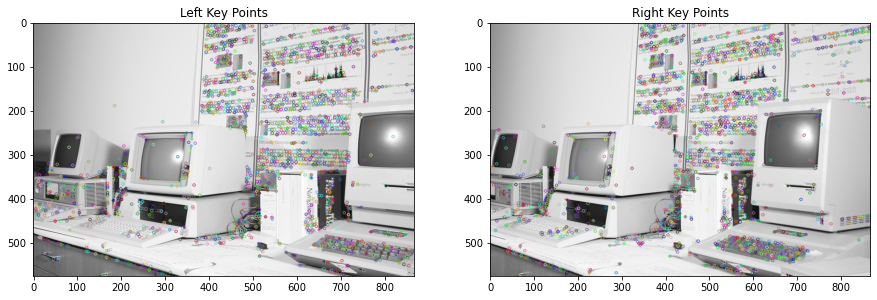

In [15]:
figure, a = plt.subplots(1, 2,figsize=(15,15))
a[0].imshow(out1, cmap='gray')
a[0].set_title("Left Key Points")
a[1].imshow(out2, cmap='gray')
a[1].set_title("Right Key Points")

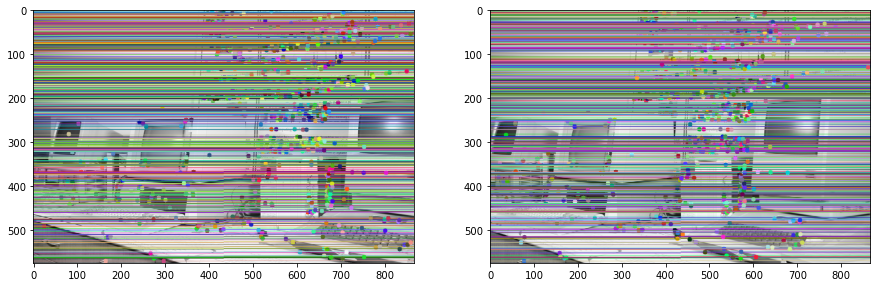

In [7]:
el=epipolar(coml,comr,data,1)

In [8]:
dl = cv.imread("daft_punk_left.jpg")
dr = cv.imread("daft_punk_right.jpg")
dl = cv.cvtColor(dl, cv.COLOR_BGR2GRAY)
dr = cv.cvtColor(dr, cv.COLOR_BGR2GRAY)
d=getFeatureData(dl,dr)

array([[ 2.95729837e-07,  3.29646674e-06, -1.33817994e-03],
       [ 3.88063871e-06, -3.17459070e-07, -5.92251877e-03],
       [-1.18049901e-03,  3.09820462e-03,  1.00000000e+00]])

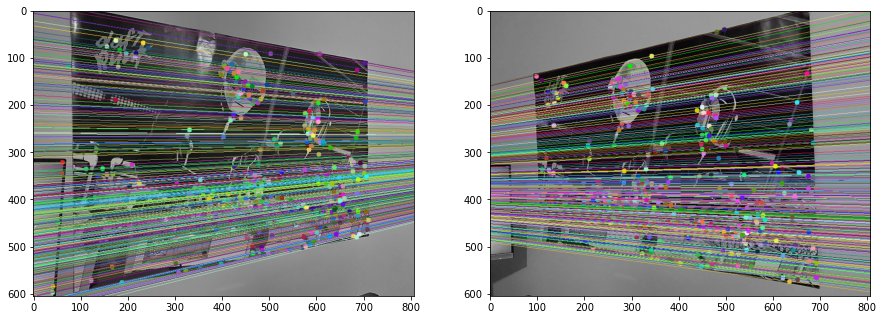

In [9]:
epipolar(dl,dr,d,1)

In [10]:
def disp_left(event, x, y, flags, imgs):
    if event == cv.EVENT_LBUTTONDOWN:
        img1 = imgs[0].copy()
        img2 = imgs[1].copy()
        f=epipolar(imgs[0],imgs[1],getFeatureData(imgs[0],imgs[1]),0)
        line = cv.computeCorrespondEpilines(np.array([[x,y]]), 1,f)
        line = line[0][0]
        c = imgs[0].shape[1]
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -line[2]/line[1]])
        x1,y1 = map(int, [c, -(line[2]+line[0]*c)/line[1]])
        img1 = cv.line(imgs[2], (x0,y0), (x1,y1), color,1)
        img2 = cv.circle(imgs[3],(x,y),5,color,-1)
        cv.imshow('Right',img1)
        cv.imshow('Left',img2)

In [11]:
def disp_right(event, x, y, flags, imgs):
    if event == cv.EVENT_LBUTTONDOWN:
        img1 = imgs[0].copy()
        img2 = imgs[1].copy()
        f=epipolar(imgs[0],imgs[1],getFeatureData(imgs[0],imgs[1]),0)
        line = cv.computeCorrespondEpilines(np.array([[x,y]]), 2,f)
        line = line[0][0]
        c = imgs[0].shape[1]
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -line[2]/line[1]])
        x1,y1 = map(int, [c, -(line[2]+line[0]*c)/line[1]])
        img1 = cv.line(imgs[2], (x0,y0), (x1,y1), color,1)
        img2 = cv.circle(imgs[3],(x,y),5,color,-1)
        cv.imshow('Left',img1)
        cv.imshow('Right',img2)

In [12]:
coml = cv.imread("computers_left.png")
comr = cv.imread("computers_right.png")
comlb = cv.cvtColor(coml, cv.COLOR_BGR2GRAY)
comrb = cv.cvtColor(comr, cv.COLOR_BGR2GRAY)
cv.imshow('Left', coml)
cv.imshow('Right',comr)
cv.setMouseCallback('Left', disp_left, [comrb,comlb,comr.copy(),coml.copy()])
cv.setMouseCallback('Right', disp_right, [comlb,comrb,coml.copy(),comr.copy()])
while True:
    key=cv.waitKey(1)
    if key==27: #if key pressed is esc
        break
cv.destroyAllWindows()

In [13]:
img1 = cv.imread("daft_punk_left.jpg")
img2 = cv.imread("daft_punk_right.jpg")
img1b = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img2b = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
cv.imshow('Left', img1)
cv.imshow('Right', img2)
cv.setMouseCallback('Left', disp_left, [img2b,img1b,img2.copy(),img1.copy()])
cv.setMouseCallback('Right', disp_right, [img1b,img2b,img1.copy(),img2.copy()])
while True:
    key=cv.waitKey(1)
    if key==27: #if key pressed is esc
        break
cv.destroyAllWindows()